In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(2,20,100)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(100)

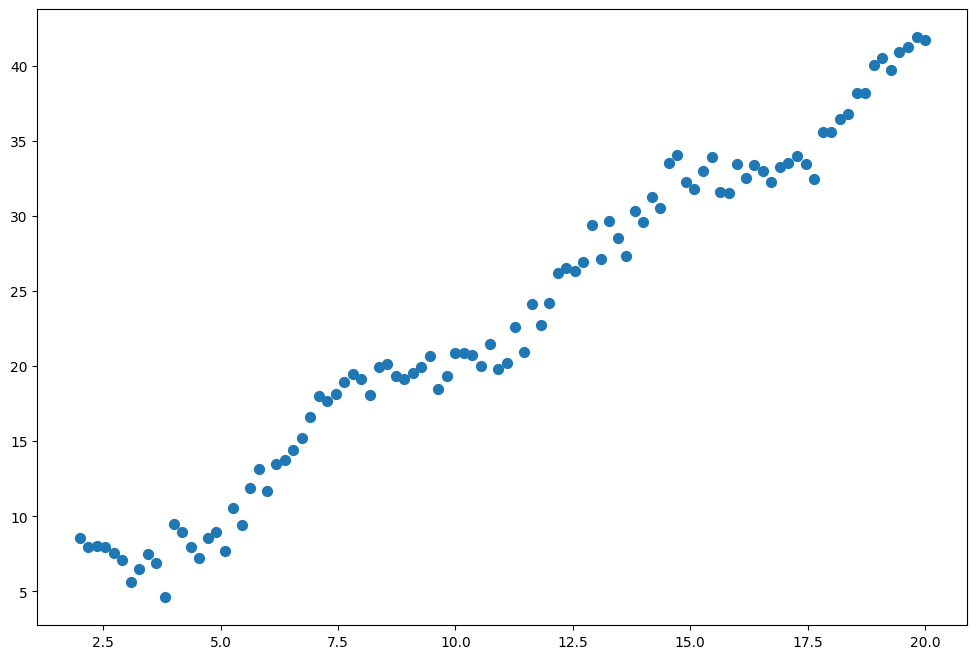

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,s=50)

In [5]:
from allison.linear_models.linear_regression import LinearRegression
from allison.utils.functions.loss import mean_square_error
from allison.utils.metrics import r2_score

In [9]:
model=LinearRegression()

model.optimizers(mean_square_error,
                 r2_score,
                 0.001)

model.train(x,y,15)

Iter:	1	==================================================>	 precision: -369.113% 

Iter:	2	==================================================>	 precision: -168.711% 

Iter:	3	==================================================>	 precision: -54.304% 

Iter:	4	==================================================>	 precision: 10.986% 

Iter:	5	==================================================>	 precision: 48.227% 

Iter:	6	==================================================>	 precision: 69.455% 

Iter:	7	==================================================>	 precision: 81.546% 

Iter:	8	==================================================>	 precision: 88.424% 

Iter:	9	==================================================>	 precision: 92.330% 

Iter:	10	==================================================>	 precision: 94.545% 

Iter:	11	==================================================>	 precision: 95.797% 

Iter:	12	==================================================>	 precision: 96.502% 

Iter:	13

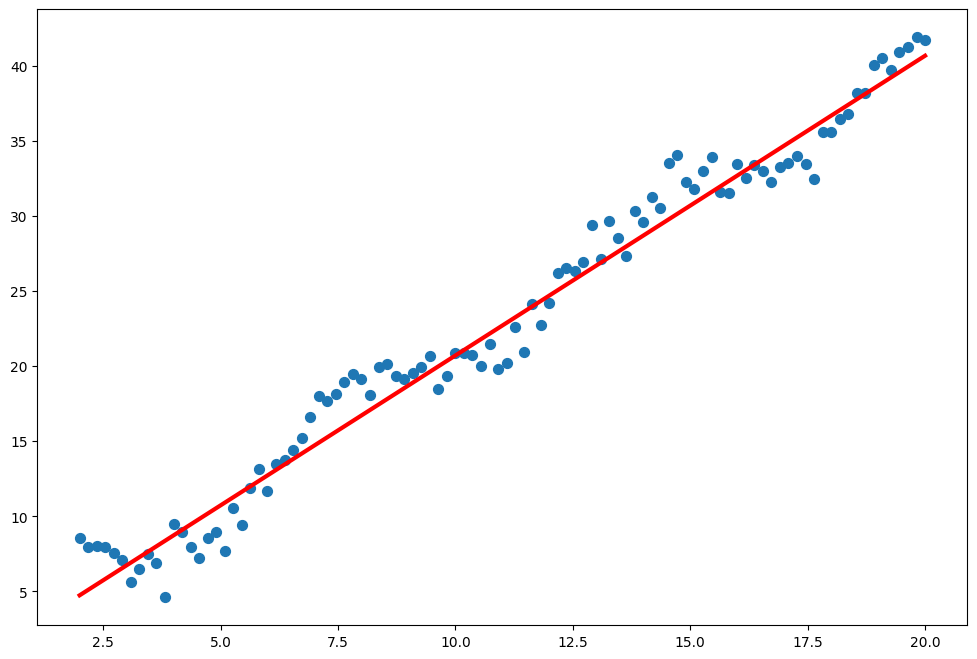

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,s=50)
plt.plot(x,model.predict(x), lw=3, c='red')